--- Logistic Regression Report ---
Accuracy Score: 0.9722

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.94      1.00      0.97        33

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



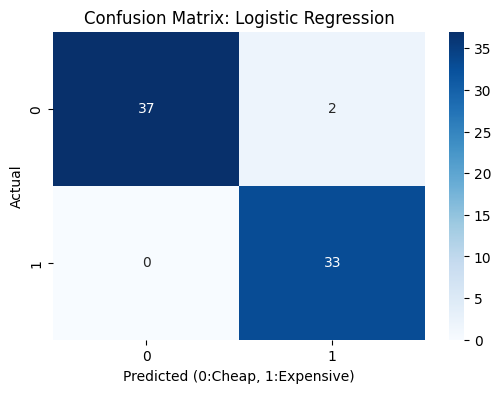

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. โหลดข้อมูล
data = pd.read_csv("../data/cleaned_house_sale.csv")

# 2. [จุดสำคัญ] แปลงราคา (Continuous) ให้เป็นกลุ่ม (Category)
# ในตัวอย่างนี้: ถ้าราคาสูงกว่าค่ากลาง (Median) ให้เป็น 1 (แพง), ถ้าต่ำกว่าให้เป็น 0 (ถูก)
median_price = data['price_usd'].median()
data['is_expensive'] = (data['price_usd'] > median_price).astype(int)

# 3. กำหนด Features (X) และ Target (y เป็นตัวที่แปลงแล้ว)
X = data[["area", "colB", "colC", "house_age", "zone_rating"]]
y = data["is_expensive"] 

# 4. แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Scaling (สำคัญมากสำหรับ Logistic เพราะใช้การคำนวณแบบ Gradient)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. สร้างและฝึกสอนโมเดl
model = LogisticRegression(
    C=0.1,                # ปรับความเข้มงวด (ยิ่งน้อยยิ่งเข้ม)
    penalty='l2',         # เลือกใช้, L1 (Lasso-style), l2 Ridge, elasticnet ผสม
    solver='newton-cholesky',   # ตัวแก้ปัญหา (เหมาะกับข้อมูลขนาดเล็ก)
    max_iter=10000000,        # จำนวนรอบการคำนวณ
    random_state=42
)
model.fit(X_train_scaled, y_train)

# 7. ทำนายผล (จะได้ค่า 0 หรือ 1)
y_pred = model.predict(X_test_scaled)

# 8. วัดผลลัพธ์
print("--- Logistic Regression Report ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. Visualization: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted (0:Cheap, 1:Expensive)')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()